In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
from sklearn.model_selection import train_test_split # for splitting dataset
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics # for checking the model accuracy
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
import tensorflow as tf
from pandas import DataFrame, Series
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding, SimpleRNN
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import Callback
from imblearn.over_sampling import SMOTE

In [2]:
humidity = pd.read_csv("data/humidity.csv")
temp = pd.read_csv("data/temperature.csv")
pressure = pd.read_csv("data/pressure.csv")
city=pd.read_csv('data/city_attributes.csv')
descrip=pd.read_csv('data/weather_description.csv')
winddir=pd.read_csv('data/wind_direction.csv')
windspeed=pd.read_csv('data/wind_speed.csv')

In [3]:
humidity.shape

(45253, 37)

In [4]:
temp.shape


(45253, 37)

In [5]:
humidity.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0


In [6]:
humidity.describe()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
count,43427.000000,44804.000000,44311.000000,44964.000000,45101.000000,44909.000000,44411.000000,43945.000000,44543.000000,43445.000000,...,44629.000000,43629.000000,43557.000000,44804.000000,44394.000000,44140.000000,44283.000000,44435.000000,44436.000000,44347.000000
mean,81.895480,74.697616,76.875042,77.159038,62.773841,67.784809,31.937831,37.484424,45.186157,53.022557,...,68.017769,66.642417,71.861538,77.375301,70.604857,66.861509,53.155184,79.800383,78.606760,68.732293
std,14.522221,19.042656,17.396016,18.147464,21.818042,19.419307,20.041855,21.662728,23.336546,23.905392,...,18.790524,19.874727,16.825027,18.750190,21.321606,16.464177,27.305008,23.051692,23.682244,19.273881
min,12.000000,10.000000,6.000000,13.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,10.000000,10.000000,7.000000,11.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
25%,73.000000,63.000000,68.000000,66.000000,48.000000,56.000000,16.000000,21.000000,26.000000,33.000000,...,54.000000,51.000000,60.000000,65.000000,54.000000,58.000000,31.000000,63.000000,61.000000,56.000000
50%,86.000000,80.000000,81.000000,81.000000,66.000000,71.000000,27.000000,32.000000,42.000000,52.000000,...,68.000000,68.000000,74.000000,81.000000,77.000000,69.000000,48.000000,89.000000,87.000000,70.000000
75%,93.000000,90.000000,89.000000,93.000000,81.000000,82.000000,43.000000,50.000000,63.000000,73.000000,...,84.000000,83.000000,86.000000,93.000000,88.000000,78.000000,75.000000,100.000000,100.000000,83.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [7]:
#combining thr datset for city boston
Boston=(humidity[['datetime','Boston']].merge(temp[['datetime','Boston']],on='datetime').merge(pressure[['datetime','Boston']], on='datetime').merge(windspeed[['datetime','Boston']], on='datetime').merge(winddir[['datetime','Boston']], on='datetime').merge(descrip[['datetime','Boston']], on='datetime'))

C:\Users\rimon\AppData\Local\Temp\ipykernel_12212\2266549069.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Boston_x'} in the result is deprecated and will raise a MergeError in a future version.
  Boston=(humidity[['datetime','Boston']].merge(temp[['datetime','Boston']],on='datetime').merge(pressure[['datetime','Boston']], on='datetime').merge(windspeed[['datetime','Boston']], on='datetime').merge(winddir[['datetime','Boston']], on='datetime').merge(descrip[['datetime','Boston']], on='datetime'))
C:\Users\rimon\AppData\Local\Temp\ipykernel_12212\2266549069.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Boston_x'} in the result is deprecated and will raise a MergeError in a future version.
  Boston=(humidity[['datetime','Boston']].merge(temp[['datetime','Boston']],on='datetime').merge(pressure[['datetime','Boston']], on='datetime').merge(windspeed[['datetime','Boston']], on='datetime').merge(winddir[['datetime','Boston']], on='datetime'

In [8]:
#weather data of Boston
Boston.columns=['datetime','humidity','temperature','pressure','windspeed','winddirection','description']
Boston.head()

,datetime,humidity,temperature,pressure,windspeed,winddirection,description
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-01 13:00:00,68.0,287.170000,1014.0,3.0,60.0,sky is clear
2,2012-10-01 14:00:00,68.0,287.186092,1014.0,3.0,60.0,few clouds
3,2012-10-01 15:00:00,68.0,287.231672,1014.0,3.0,60.0,few clouds
4,2012-10-01 16:00:00,68.0,287.277251,1014.0,3.0,60.0,few clouds


In [9]:
Boston.shape

(45253, 7)

In [10]:
Boston.describe()

,humidity,temperature,pressure,windspeed,winddirection
count,44804.000000,45250.000000,45246.000000,45252.000000,45252.000000
mean,77.375301,283.779823,1019.861314,3.380889,184.915562
std,18.750190,9.802499,9.548220,2.277266,107.763589
min,11.000000,249.540000,978.000000,0.000000,0.000000
25%,65.000000,276.090000,1014.000000,2.000000,80.000000
50%,81.000000,284.133250,1019.000000,3.000000,210.000000
75%,93.000000,291.620000,1026.000000,5.000000,272.000000
max,100.000000,308.000000,1054.000000,20.000000,360.000000


In [11]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       45253 non-null  object 
 1   humidity       44804 non-null  float64
 2   temperature    45250 non-null  float64
 3   pressure       45246 non-null  float64
 4   windspeed      45252 non-null  float64
 5   winddirection  45252 non-null  float64
 6   description    45252 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.8+ MB


In [12]:
import datetime
Boston['datetime']=pd.to_datetime(Boston['datetime'])
Boston.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       45253 non-null  datetime64[ns]
 1   humidity       44804 non-null  float64       
 2   temperature    45250 non-null  float64       
 3   pressure       45246 non-null  float64       
 4   windspeed      45252 non-null  float64       
 5   winddirection  45252 non-null  float64       
 6   description    45252 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 2.8+ MB


In [13]:
Boston.isnull().sum()

datetime           0
humidity         449
temperature        3
pressure           7
windspeed          1
winddirection      1
description        1
dtype: int64

In [14]:
Boston['humidity']=Boston['humidity'].fillna(method='bfill')
Boston['temperature']=Boston['temperature'].fillna(method='bfill')
Boston['pressure']=Boston['pressure'].fillna(method='bfill')
Boston['windspeed']=Boston['windspeed'].fillna(method='bfill')
Boston['winddirection']=Boston['winddirection'].fillna(method='bfill')
Boston['description']=Boston['description'].fillna(method='bfill')

In [15]:
Boston.isnull().sum()

datetime         0
humidity         0
temperature      0
pressure         0
windspeed        0
winddirection    0
description      0
dtype: int64

In [16]:
Boston.head()

,datetime,humidity,temperature,pressure,windspeed,winddirection,description
0,2012-10-01 12:00:00,68.0,287.170000,1014.0,3.0,60.0,sky is clear
1,2012-10-01 13:00:00,68.0,287.170000,1014.0,3.0,60.0,sky is clear
2,2012-10-01 14:00:00,68.0,287.186092,1014.0,3.0,60.0,few clouds
3,2012-10-01 15:00:00,68.0,287.231672,1014.0,3.0,60.0,few clouds
4,2012-10-01 16:00:00,68.0,287.277251,1014.0,3.0,60.0,few clouds


In [17]:
# Splitting Date-Time
time=pd.DatetimeIndex(Boston['datetime'])
Boston['day']=time.day
Boston['month']=time.month
Boston['year']=time.year
del Boston['datetime']

Boston

,humidity,temperature,pressure,windspeed,winddirection,description,day,month,year
0,68.0,287.170000,1014.0,3.0,60.0,sky is clear,1,10,2012
1,68.0,287.170000,1014.0,3.0,60.0,sky is clear,1,10,2012
2,68.0,287.186092,1014.0,3.0,60.0,few clouds,1,10,2012
3,68.0,287.231672,1014.0,3.0,60.0,few clouds,1,10,2012
4,68.0,287.277251,1014.0,3.0,60.0,few clouds,1,10,2012
...,...,...,...,...,...,...,...,...,...
45248,37.0,288.080000,1017.0,8.0,290.0,broken clouds,29,11,2017
45249,74.0,286.020000,1019.0,6.0,340.0,broken clouds,29,11,2017
45250,74.0,283.940000,1019.0,7.0,340.0,broken clouds,29,11,2017
45251,56.0,282.170000,1022.0,2.0,330.0,few clouds,29,11,2017


In [18]:
Boston.description

0         sky is clear
1         sky is clear
2           few clouds
3           few clouds
4           few clouds
             ...      
45248    broken clouds
45249    broken clouds
45250    broken clouds
45251       few clouds
45252    broken clouds
Name: description, Length: 45253, dtype: object

In [19]:
Boston.describe()

,humidity,temperature,pressure,windspeed,winddirection,day,month,year
count,45253.000000,45253.000000,45253.000000,45253.000000,45253.000000,45253.000000,45253.000000,45253.000000
mean,77.297129,283.779303,1019.861026,3.380881,184.912801,15.725322,6.648730,2014.821051
std,18.782166,9.802595,9.547977,2.277242,107.763998,8.793919,3.464906,1.507743
min,11.000000,249.540000,978.000000,0.000000,0.000000,1.000000,1.000000,2012.000000
25%,64.000000,276.090000,1014.000000,2.000000,80.000000,8.000000,4.000000,2014.000000
50%,81.000000,284.132500,1019.000000,3.000000,210.000000,16.000000,7.000000,2015.000000
75%,93.000000,291.620000,1026.000000,5.000000,272.000000,23.000000,10.000000,2016.000000
max,100.000000,308.000000,1054.000000,20.000000,360.000000,31.000000,12.000000,2017.000000


In [20]:
# Number of Samples of Each Target Class of The Dataframe
Boston.groupby('description').size()

description
broken clouds                    3313
drizzle                            63
dust                                5
few clouds                       2214
fog                              1331
freezing rain                       1
haze                              234
heavy intensity drizzle             5
heavy intensity rain              425
heavy snow                        133
light intensity drizzle           176
light rain                       4828
light rain and snow                 1
light snow                        565
mist                             4803
moderate rain                    1705
overcast clouds                  4081
proximity thunderstorm             95
scattered clouds                 3459
sky is clear                    17445
snow                              265
squalls                             7
thunderstorm                       31
thunderstorm with heavy rain        6
thunderstorm with light rain       18
thunderstorm with rain              6


C:\Users\rimon\AppData\Local\Temp\ipykernel_12212\1409139502.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  change = class_occur.append(pd.Series([class_occur[9]+class_occur[10]+class_occur[11]+class_occur[12]+class_occur[13]+class_occur[14]+class_occur[15]+class_occur[16]+class_occur[17]+class_occur[18]+class_occur[19]+class_occur[20]+class_occur[21]+class_occur[22]+class_occur[23]+class_occur[24]+class_occur[25]+class_occur[26]]))


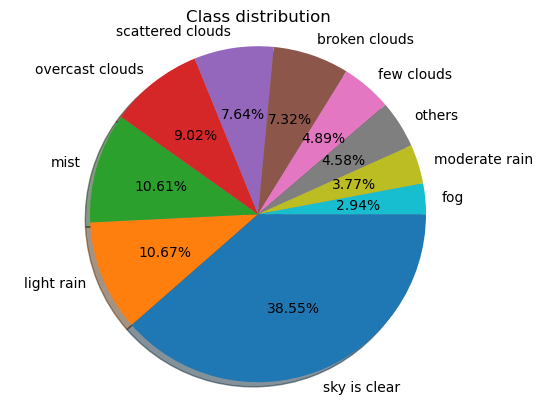

In [21]:
# Processing Data For Pie Chart
class_occur = Boston['description'].value_counts()
class_names = ['sky is clear','light rain','mist','overcast clouds','scattered clouds','broken clouds', 'few clouds','others','moderate rain','fog']
change = class_occur.append(pd.Series([class_occur[9]+class_occur[10]+class_occur[11]+class_occur[12]+class_occur[13]+class_occur[14]+class_occur[15]+class_occur[16]+class_occur[17]+class_occur[18]+class_occur[19]+class_occur[20]+class_occur[21]+class_occur[22]+class_occur[23]+class_occur[24]+class_occur[25]+class_occur[26]]))
change = change.rename(index={0: 'others'})
class_occur   = change.drop(['light snow', 'heavy intensity rain', 'snow', 'haze', 'light intensity drizzle', 'heavy snow', 'proximity thunderstorm', 'drizzle', 'very heavy rain', 'thunderstorm', 'thunderstorm with light rain', 'squalls', 'thunderstorm with rain', 'thunderstorm with heavy rain', 'dust', 'heavy intensity drizzle', 'light rain and snow', 'freezing rain']);
class_occur = class_occur.sort_values(ascending=False)

# Creating Pie Chart Of Target Class
fig, ax = plt.subplots()
ax.pie(class_occur, labels=class_names, autopct='%1.2f%%',
       shadow=True, startangle=0, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()

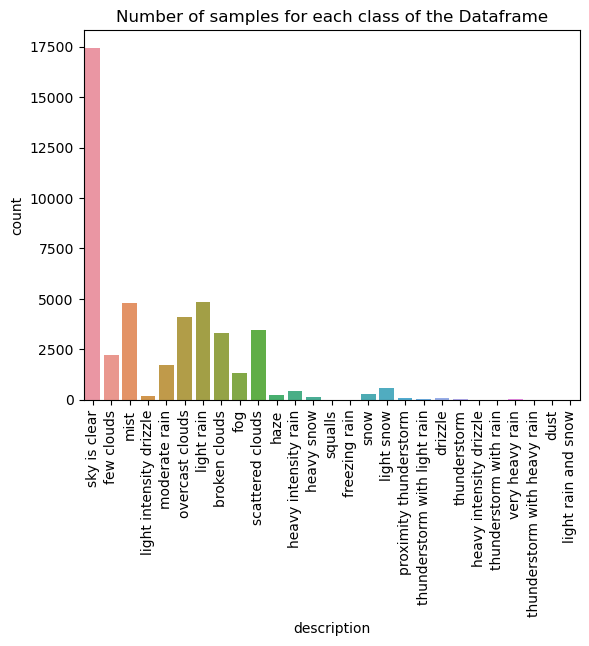

In [22]:
# Visualization of Samples of Each Target Class of The Dataframe
sns.countplot(x='description', data=Boston)

plt.xticks(rotation=90)

plt.title("Number of samples for each class of the Dataframe");

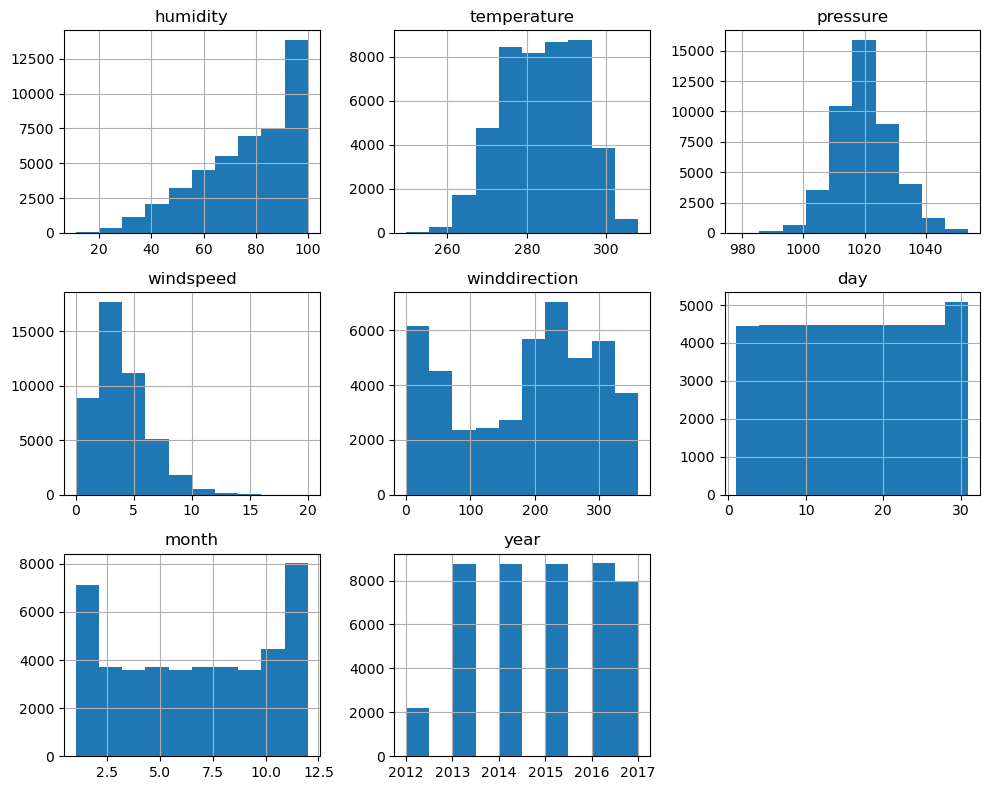

In [23]:
# Showing Histogram Of Data
fig = Boston.hist(figsize=(10,8))

plt.tight_layout()

plt.show()


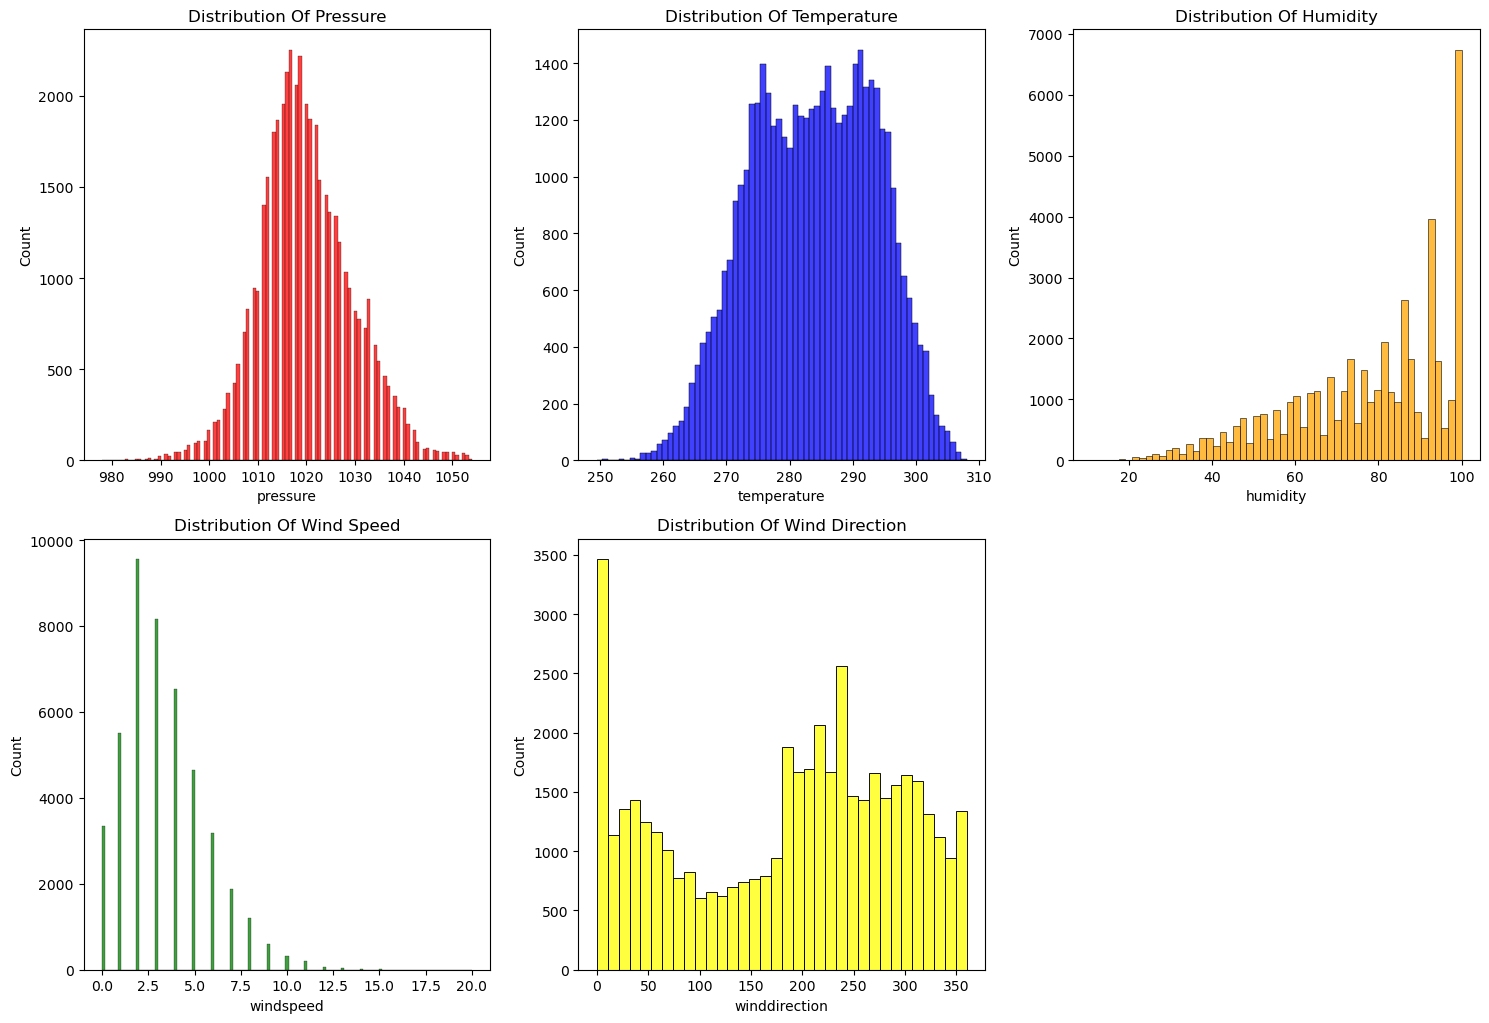

In [24]:
# Visualization to check the distribution of the attributes:
plt.figure(figsize=(15,15))

plt.subplot(3,3,1)
sns.histplot(Boston['pressure'],color='red')
plt.title('Distribution Of Pressure')

plt.subplot(3,3,2)
sns.histplot(Boston['temperature'],color='blue')
plt.title('Distribution Of Temperature')

plt.subplot(3,3,3)
sns.histplot(Boston['humidity'],color='orange')
plt.title('Distribution Of Humidity')

plt.subplot(3,3,4)
sns.histplot(Boston['windspeed'],color='green')
plt.title('Distribution Of Wind Speed')

plt.subplot(3,3,5)
sns.histplot(Boston['winddirection'],color='yellow')
plt.title('Distribution Of Wind Direction')

plt.tight_layout()
plt.show()

In [25]:
Boston = Boston[Boston.description != 'freezing rain']

Boston = Boston[Boston.description != 'light rain and snow']

Boston = Boston[Boston.description != 'dust']

Boston = Boston[Boston.description != 'heavy intensity drizzle']

In [26]:
# Creating encoder for categorical value of weather
label_descr = LabelEncoder()

# Transforming Column Into Encoded labels
Boston['description'] = label_descr.fit_transform(Boston['description'])

Boston

,humidity,temperature,pressure,windspeed,winddirection,description,day,month,year
0,68.0,287.170000,1014.0,3.0,60.0,15,1,10,2012
1,68.0,287.170000,1014.0,3.0,60.0,15,1,10,2012
2,68.0,287.186092,1014.0,3.0,60.0,2,1,10,2012
3,68.0,287.231672,1014.0,3.0,60.0,2,1,10,2012
4,68.0,287.277251,1014.0,3.0,60.0,2,1,10,2012
...,...,...,...,...,...,...,...,...,...
45248,37.0,288.080000,1017.0,8.0,290.0,0,29,11,2017
45249,74.0,286.020000,1019.0,6.0,340.0,0,29,11,2017
45250,74.0,283.940000,1019.0,7.0,340.0,0,29,11,2017
45251,56.0,282.170000,1022.0,2.0,330.0,2,29,11,2017


In [27]:
# Feature matrix
X = Boston[['day', 'month', 'year', 'humidity', 'pressure', 'temperature', 'windspeed', 'winddirection']]
# X = frame[['humidity','pressure','temperature','wind_speed','wind_direction']]
X

,day,month,year,humidity,pressure,temperature,windspeed,winddirection
0,1,10,2012,68.0,1014.0,287.170000,3.0,60.0
1,1,10,2012,68.0,1014.0,287.170000,3.0,60.0
2,1,10,2012,68.0,1014.0,287.186092,3.0,60.0
3,1,10,2012,68.0,1014.0,287.231672,3.0,60.0
4,1,10,2012,68.0,1014.0,287.277251,3.0,60.0
...,...,...,...,...,...,...,...,...
45248,29,11,2017,37.0,1017.0,288.080000,8.0,290.0
45249,29,11,2017,74.0,1019.0,286.020000,6.0,340.0
45250,29,11,2017,74.0,1019.0,283.940000,7.0,340.0
45251,29,11,2017,56.0,1022.0,282.170000,2.0,330.0


In [28]:
# Target variable
# y = frame['temperature'].astype('int')
y = Boston['description']
y

0        15
1        15
2         2
3         2
4         2
         ..
45248     0
45249     0
45250     0
45251     2
45252     0
Name: description, Length: 45241, dtype: int32

In [29]:
import os
os.environ["THREADPOOLCTL_THREAD_COUNT"] = "1"
import imblearn
import sklearn
print(imblearn.__version__)
print(sklearn.__version__)


0.11.0
1.2.1


In [30]:
# Creating The Object With The Desired Sampling Strategy.
smote = SMOTE(sampling_strategy='not majority')
# fit the object to our training data
X, y = smote.fit_resample(Boston.loc[:, Boston.columns != 'description'], Boston['description'])


print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (401235, 8)
Shape of y: (401235,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 16)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (361111, 8)
X_test shape:  (40124, 8)
y_train shape:  (361111,)
y_test shape:  (40124,)


In [32]:
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm.
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print("----------------------------------")
print('The accuracy of the whole model in KNN is: {}'.format(score_knn))
print("----------------------------------")

----------------------------------
The accuracy of the whole model in KNN is: 0.9379
----------------------------------


In [33]:
Tp = 10000

In [34]:
def plot_train_points(quantity='humidity',Tp=7000):
    plt.figure(figsize=(15,4))
    if quantity=='humidity':
        plt.title("Humidity of first {} data points".format(Tp),fontsize=16)
        plt.plot(Boston['humidity'][:Tp],c='k',lw=1)
    if quantity=='temperature':
        plt.title("Temperature of first {} data points".format(Tp),fontsize=16)
        plt.plot(Boston['temperature'][:Tp],c='k',lw=1)
    if quantity=='pressure':
        plt.title("Pressure of first {} data points".format(Tp),fontsize=16)
        plt.plot(Boston['pressure'][:Tp],c='k',lw=1)
    plt.grid(True)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

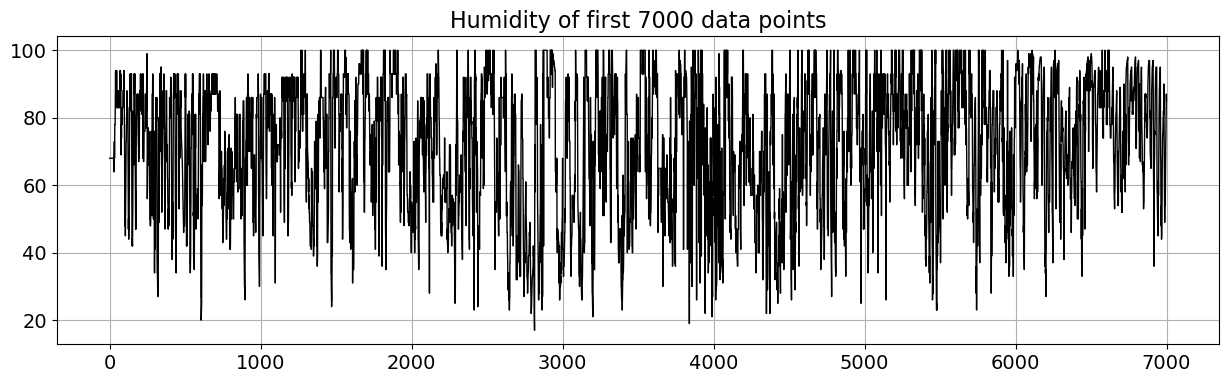

In [35]:
plot_train_points('humidity')

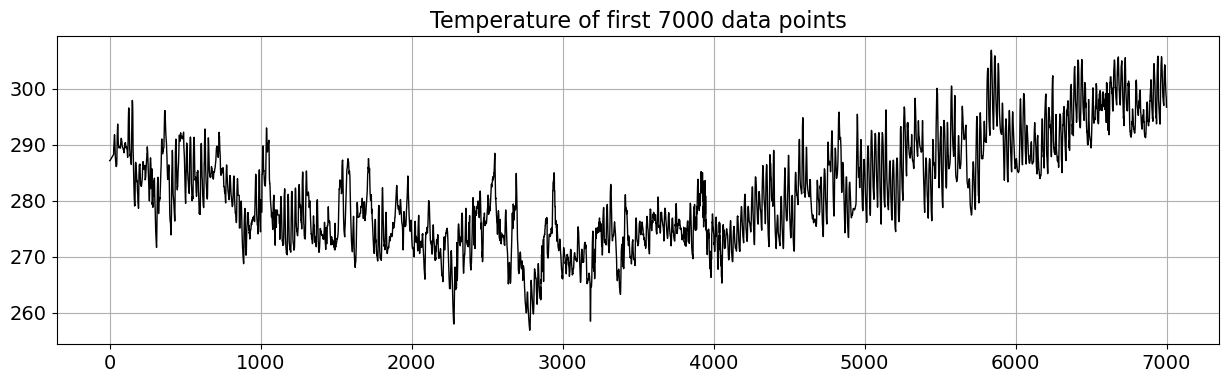

In [36]:
plot_train_points('temperature')

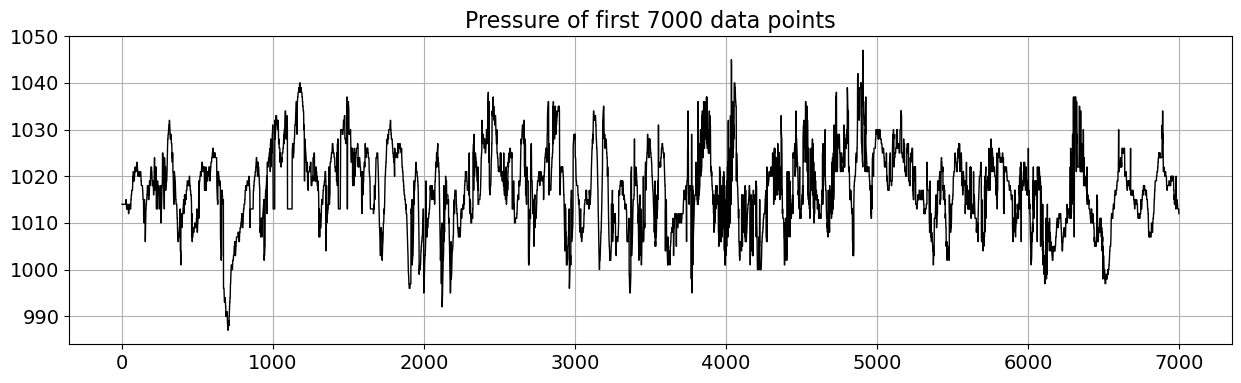

In [37]:
plot_train_points('pressure')

In [38]:
Boston.interpolate(inplace=True)
Boston.dropna(inplace=True)
print(Boston.shape)

(45241, 9)


In [39]:
train = np.array(Boston['humidity'][:Tp])
test = np.array(Boston['humidity'][Tp:])

In [40]:
print("Train data length:", train.shape)
print("Test data length:", test.shape)

Train data length: (10000,)
Test data length: (35241,)


In [41]:
train=train.reshape(-1,1)
test=test.reshape(-1,1)

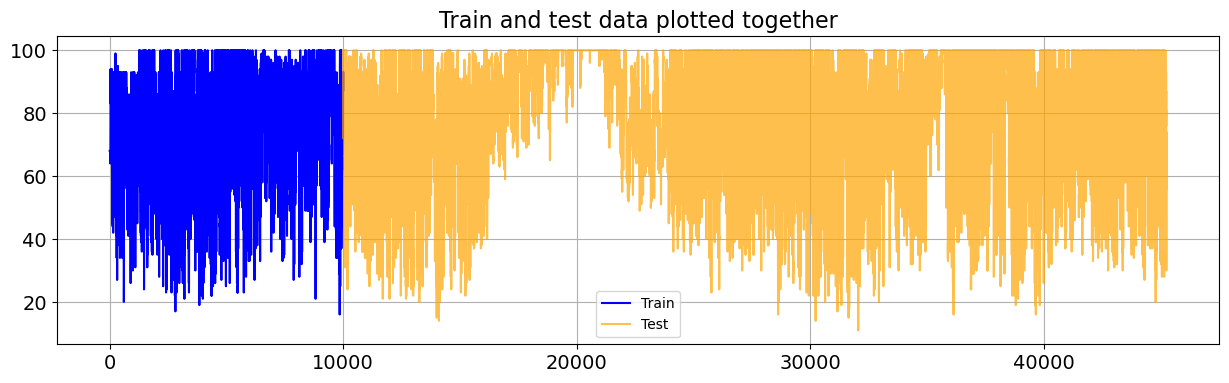

In [42]:
plt.figure(figsize=(15,4))
plt.title("Train and test data plotted together",fontsize=16)
plt.plot(np.arange(Tp),train,c='blue')
plt.plot(np.arange(Tp,45241),test,c='orange',alpha=0.7)
plt.legend(['Train','Test'])
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [43]:
step = 8

In [44]:
# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))

In [45]:
print("Train data length:", train.shape)
print("Test data length:", test.shape)

Train data length: (10008,)
Test data length: (35249,)


In [46]:
def convertToMatrix(data, step):
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [47]:
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)

In [48]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [49]:
print("Training data shape:", trainX.shape,', ',trainY.shape)
print("Test data shape:", testX.shape,', ',testY.shape)

Training data shape: (10000, 1, 8) ,  (10000,)
Test data shape: (35241, 1, 8) ,  (35241,)


In [50]:
def build_simple_rnn(num_units=128, embedding=4,num_dense=32,lr=0.001):
    """
    Builds and compiles a simple RNN model
    Arguments:
              num_units: Number of units of a the simple RNN layer
              embedding: Embedding length
              num_dense: Number of neurons in the dense layer followed by the RNN layer
              lr: Learning rate (uses RMSprop optimizer)
    Returns:
              A compiled Keras model.
    """
    model = Sequential()
    model.add(SimpleRNN(units=num_units, input_shape=(1,embedding), activation="relu"))
    model.add(Dense(num_dense, activation="relu"))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=RMSprop(lr=lr),metrics=['mse'])
    
    return model

In [51]:
model_humidity = build_simple_rnn(num_units=128,num_dense=32,embedding=8,lr=0.0005)

In [52]:
model_humidity.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               17536     
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21697 (84.75 KB)
Trainable params: 21697 (84.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch+1) % 50 == 0 and epoch>0:
            print("Epoch number {} done".format(epoch+1))

In [54]:
batch_size=8
num_epochs = 1000

In [55]:
model_humidity.fit(trainX,trainY, 
          epochs=num_epochs, 
          batch_size=batch_size, 
          callbacks=[MyCallback()],verbose=0)

Epoch number 50 done
Epoch number 100 done
Epoch number 150 done
Epoch number 200 done
Epoch number 250 done
Epoch number 300 done
Epoch number 350 done
Epoch number 400 done
Epoch number 450 done
Epoch number 500 done
Epoch number 550 done
Epoch number 600 done
Epoch number 650 done
Epoch number 700 done
Epoch number 750 done
Epoch number 800 done
Epoch number 850 done
Epoch number 900 done
Epoch number 950 done
Epoch number 1000 done


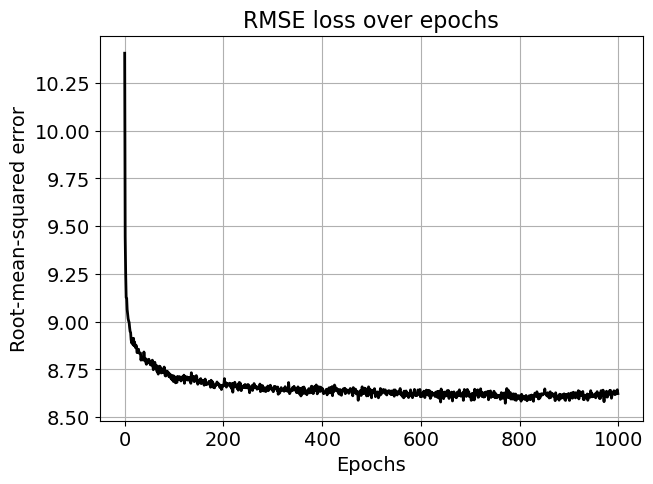

In [56]:
plt.figure(figsize=(7,5))
plt.title("RMSE loss over epochs",fontsize=16)
plt.plot(np.sqrt(model_humidity.history.history['loss']),c='k',lw=2)
plt.grid(True)
plt.xlabel("Epochs",fontsize=14)
plt.ylabel("Root-mean-squared error",fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

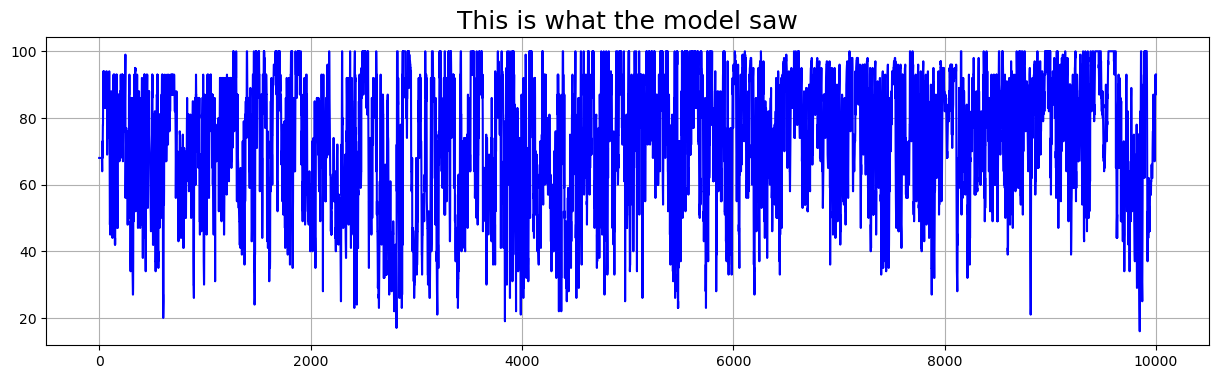

In [57]:
plt.figure(figsize=(15,4))
plt.title("This is what the model saw",fontsize=18)
plt.plot(trainX[:,0][:,0],c='blue')
plt.grid(True)
plt.show()

In [58]:
trainPredict = model_humidity.predict(trainX)
testPredict= model_humidity.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

1102/1102 [==============================] - 2s 2ms/step


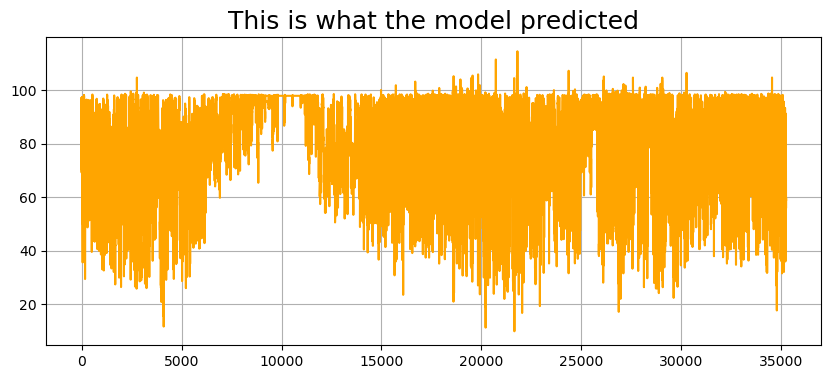

In [59]:
plt.figure(figsize=(10,4))
plt.title("This is what the model predicted",fontsize=18)
plt.plot(testPredict,c='orange')
plt.grid(True)
plt.show()

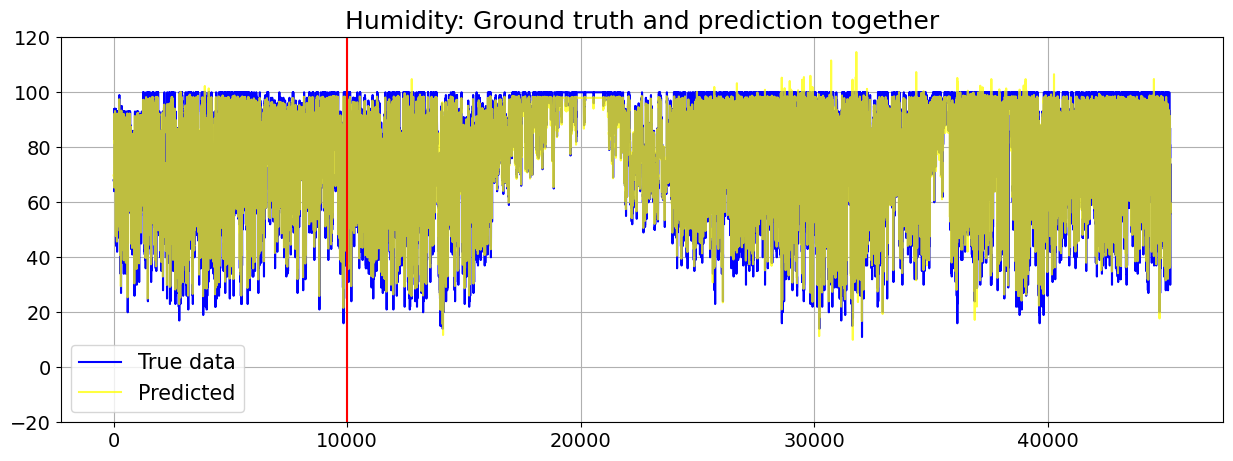

In [60]:
index = Boston.index.values

plt.figure(figsize=(15,5))
plt.title("Humidity: Ground truth and prediction together",fontsize=18)
plt.plot(index,Boston['humidity'],c='blue')
plt.plot(index,predicted,c='yellow',alpha=0.75)
plt.legend(['True data','Predicted'],fontsize=15)
plt.axvline(x=Tp, c="r")
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-20,120)
plt.show()